In [2]:
# our commonly used functions
from global_bug_bot_functions import  *


# libraries for building convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model

# libraries for tuning models
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperParameters
from tensorflow.keras import backend as K
from keras.callbacks import History, EarlyStopping


# utility libraries
import os
import time
import itertools
import random
import numpy as np

# Force TensorFlow to use GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')  # Use only the first GPU
        print("Using GPU:", gpus[0])
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found, using CPU.")

# Set random seeds for reproducibility
seed_value = 2025
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# data set constants
TRAIN_GENERATOR = load_data(TRAIN_DIR)
VAL_GENERATOR = load_data(VALID_DIR)
TEST_GENERATOR = load_data(TEST_DIR, shuffle_flag=False)
EVAL_VAL_GENERATOR = load_data(VALID_DIR, shuffle_flag=False)

# best hps found from tuning
# from ep20_pat3_del0.001_ex1_maxtr20_from_tuning_script_final_tuned_models_results_DenseNet201.csv
# ---> tuned with max epoch = 20, patience = 3, minimum delta = 0.001, max trials = 20
best_lr = 0.001
best_dropout = 0.3
best_batch_size	= 16
best_epochs	= 15

with tf.device('/GPU:0'):
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # freeze the base model layers
    base_model.trainable = False
    
    # global pooling and dropout layers included similar to jute pest architecture
    x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    x = Dropout(best_dropout)(x)
    
    # final softmax probabilistic classification layer
    output_layer = Dense(TRAIN_GENERATOR.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output_layer)
    
    optimizer = Adam(learning_rate=best_lr)
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(TRAIN_GENERATOR,validation_data=VAL_GENERATOR, epochs = best_epochs, batch_size = best_batch_size)



Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Found 6108 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Found 220 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Epoch 1/15
191/191 [==============================] - 35s 126ms/step - loss: 1.3039 - accuracy: 0.5817 - val_loss: 0.9441 - val_accuracy: 0.7023
Epoch 2/15
191/191 [==============================] - 22s 113ms/step - loss: 0.6986 - accuracy: 0.7826 - val_loss: 0.8453 - val_accuracy: 0.7273
Epoch 3/15
191/191 [==============================] - 22s 115ms/step - loss: 0.5514 - accuracy: 0.8253 - val_loss: 0.8341 - val_accuracy: 0.7227
Epoch 4/15
191/191 [==============================] - 22s 116ms/step - loss: 0.4601 - accuracy: 0.8559 - val_loss: 0.7936 - val_accuracy: 0.7545
Epoch 5/15
191/191 [==============================] - 22s 116ms/step - loss: 0.3983 - accuracy: 0.8788 - val_loss: 0.8233 - val_accuracy: 0.7477
Epoch 6/15
191/191 [==========

# Validation plots

14/14 [==============================] - 4s 102ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.700000,0.700000,0.700000,40.000000
american_house_spider,0.935484,0.725000,0.816901,40.000000
bedbug,0.666667,0.600000,0.631579,40.000000
brown_stink_bug,0.761905,0.800000,0.780488,40.000000
carpenter_ant,0.680851,0.800000,0.735632,40.000000
cellar_spider,0.857143,0.900000,0.878049,40.000000
flea,0.462963,0.625000,0.531915,40.000000
house_centipede,1.000000,0.825000,0.904110,40.000000
silverfish,0.815789,0.775000,0.794872,40.000000
subterranean_termite,0.684211,0.650000,0.666667,40.000000


<Figure size 800x600 with 0 Axes>

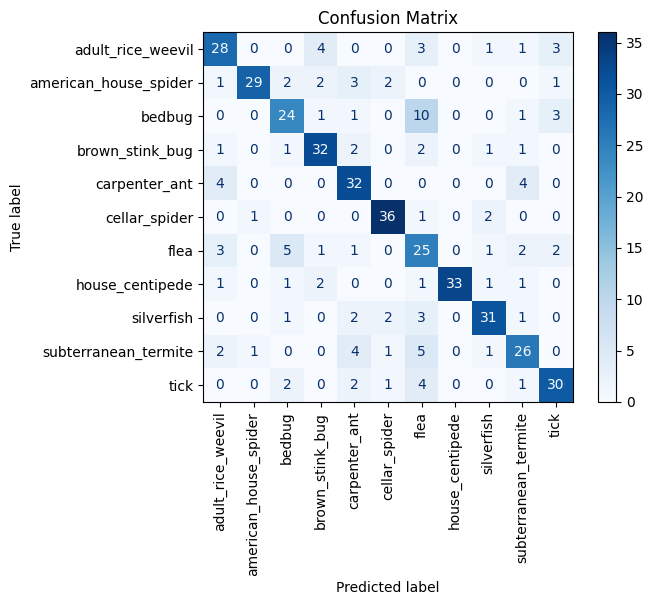

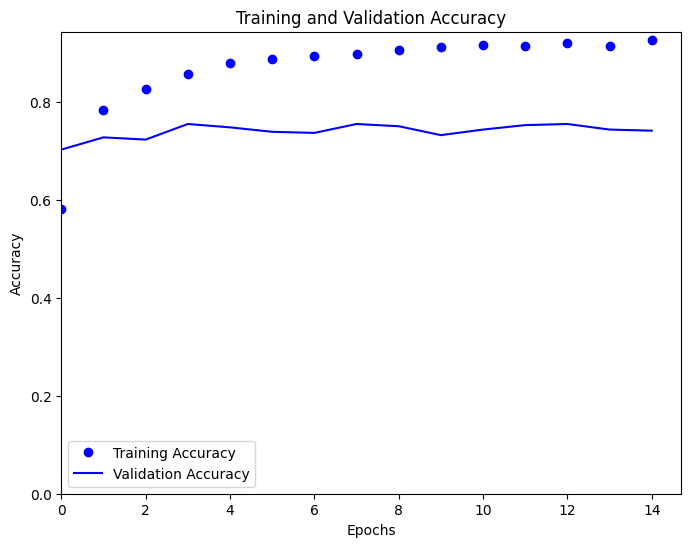

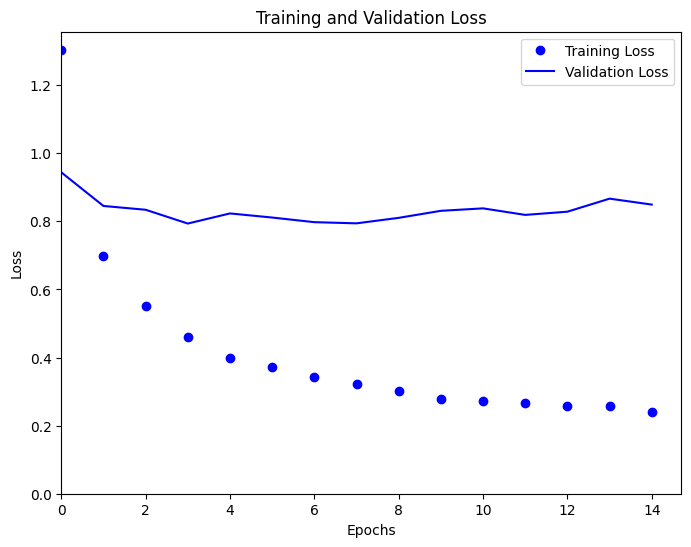

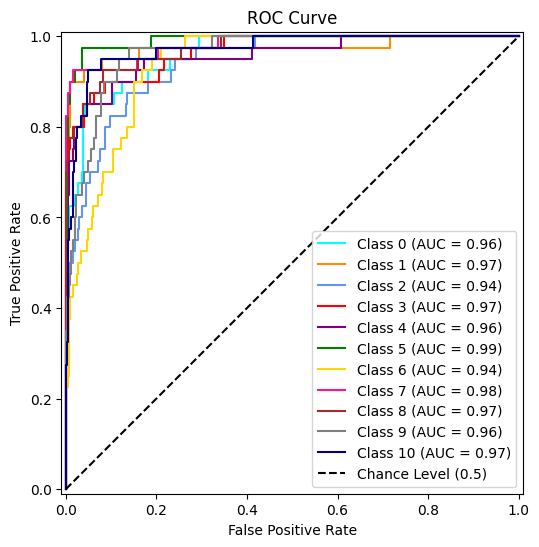

Macro-averaged One-vs-One ROC AUC score: 0.97
Accuracy: 0.741
Precision: 0.758
Recall: 0.741
F1 Score: 0.745


{'accuracy': 0.741,
 'precision': 0.758,
 'recall': 0.741,
 'f1_score': 0.745,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.700000  0.700000  0.700000   40.000000
 american_house_spider   0.935484  0.725000  0.816901   40.000000
 bedbug                  0.666667  0.600000  0.631579   40.000000
 brown_stink_bug         0.761905  0.800000  0.780488   40.000000
 carpenter_ant           0.680851  0.800000  0.735632   40.000000
 cellar_spider           0.857143  0.900000  0.878049   40.000000
 flea                    0.462963  0.625000  0.531915   40.000000
 house_centipede         1.000000  0.825000  0.904110   40.000000
 silverfish              0.815789  0.775000  0.794872   40.000000
 subterranean_termite    0.684211  0.650000  0.666667   40.000000
 tick                    0.769231  0.750000  0.759494   40.000000
 accuracy                0.740909  0.740909  0.740909    0.740909
 macro avg               0.757658  

In [3]:
%matplotlib inline
evaluation_metrics(model, EVAL_VAL_GENERATOR, history)


# Validation metrics:'accuracy': 0.741, 'precision': 0.758, 'recall': 0.741,'f1_score': 0.745

# Test plots

7/7 [==============================] - 1s 134ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.882353,0.750000,0.810811,20.000000
american_house_spider,1.000000,0.800000,0.888889,20.000000
bedbug,0.714286,0.750000,0.731707,20.000000
brown_stink_bug,0.818182,0.900000,0.857143,20.000000
carpenter_ant,0.739130,0.850000,0.790698,20.000000
cellar_spider,0.791667,0.950000,0.863636,20.000000
flea,0.500000,0.650000,0.565217,20.000000
house_centipede,1.000000,0.750000,0.857143,20.000000
silverfish,0.833333,0.750000,0.789474,20.000000
subterranean_termite,0.684211,0.650000,0.666667,20.000000


<Figure size 800x600 with 0 Axes>

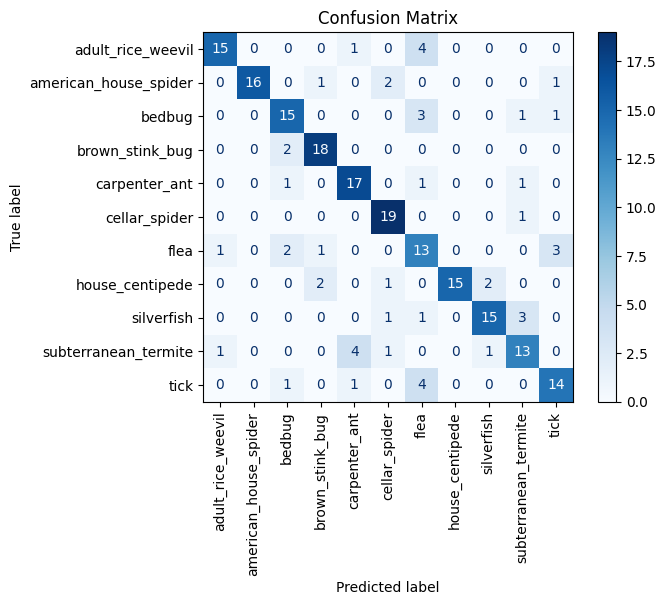

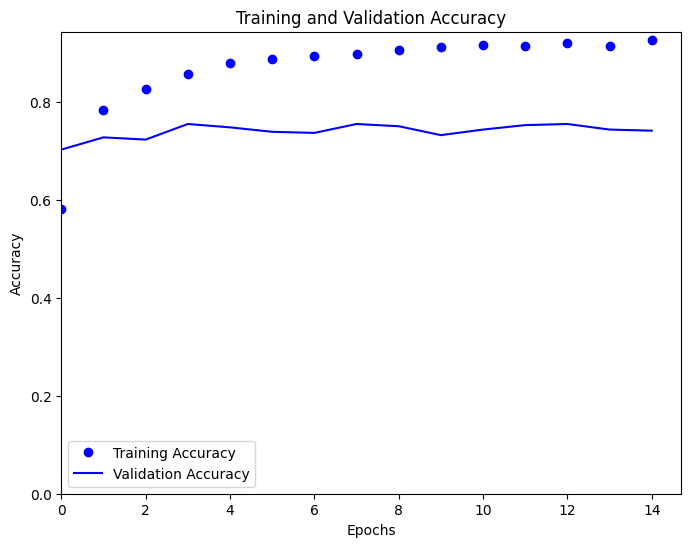

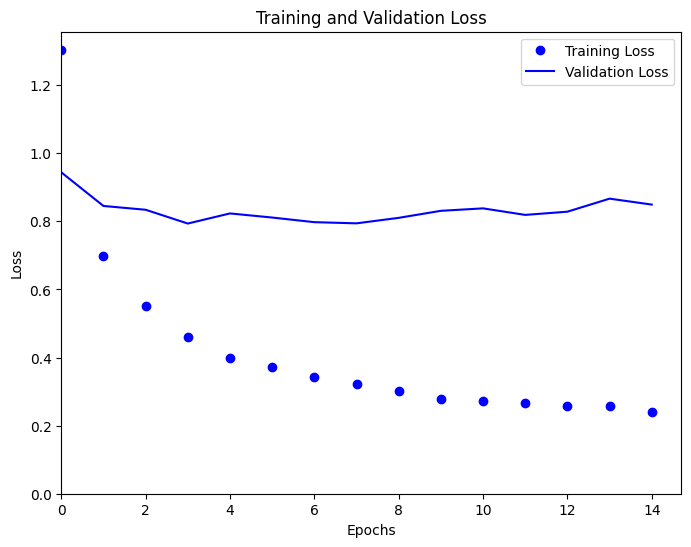

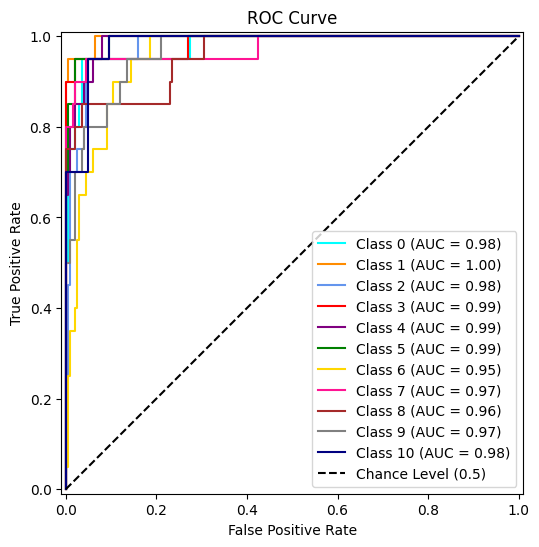

Macro-averaged One-vs-One ROC AUC score: 0.98
Accuracy: 0.773
Precision: 0.791
Recall: 0.773
F1 Score: 0.776


{'accuracy': 0.773,
 'precision': 0.791,
 'recall': 0.773,
 'f1_score': 0.776,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.882353  0.750000  0.810811   20.000000
 american_house_spider   1.000000  0.800000  0.888889   20.000000
 bedbug                  0.714286  0.750000  0.731707   20.000000
 brown_stink_bug         0.818182  0.900000  0.857143   20.000000
 carpenter_ant           0.739130  0.850000  0.790698   20.000000
 cellar_spider           0.791667  0.950000  0.863636   20.000000
 flea                    0.500000  0.650000  0.565217   20.000000
 house_centipede         1.000000  0.750000  0.857143   20.000000
 silverfish              0.833333  0.750000  0.789474   20.000000
 subterranean_termite    0.684211  0.650000  0.666667   20.000000
 tick                    0.736842  0.700000  0.717949   20.000000
 accuracy                0.772727  0.772727  0.772727    0.772727
 macro avg               0.790909  

In [4]:
%matplotlib inline
evaluation_metrics(model, TEST_GENERATOR, history)


# Test metrics: 'accuracy': 0.773, 'precision': 0.791,'recall': 0.773, 'f1_score': 0.776